# Requirements
For this tutorial, you will need `python >= 3.9`.

Make sure to install `spatialdata_io` and `spatialdata_xenium_explorer >= 1.0.4`, i.e.:
```sh
pip install spatialdata-io
pip install spatialdata_xenium_explorer
```

In [1]:
import spatialdata_io
import spatialdata_xenium_explorer

# 1. Download tutorial data

This tutorial is based on a Visium sample of colon cancer, which can be downloaded on this [10X Genomics webpage](https://www.10xgenomics.com/datasets/visium-cytassist-gene-expression-libraries-of-post-xenium-human-colon-cancer-ffpe-using-the-human-whole-transcriptome-probe-set-2-standard).
In particular, download the following files inside the same directory:
- [Feature / barcode matrix HDF5 (filtered)](https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_filtered_feature_bc_matrix.h5)
- [Spatial imaging data](https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1/CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_spatial.tar.gz) (unzip it)

# 2. Read the Visium data

In [2]:
# directory containing the Visium data you downloaded
data_path = "visium_data_directory"

# where the "Xenium Explorer files" will be created
explorer_path = "visium_data_directory.explorer"

The Visium data can be read by `spatialdata-io`:

In [ ]:
sdata = spatialdata_io.visium(data_path)

In [4]:
sdata

SpatialData object with:
├── Images
│     ├── 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_hires_image': SpatialImage[cyx] (3, 2000, 1535)
│     └── 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_lowres_image': SpatialImage[cyx] (3, 600, 461)
├── Shapes
│     └── 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1': GeoDataFrame shape: (6518, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 6518 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial': AnnData (6518, 18085)
with coordinate systems:
▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_hires_image (Images), CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1 (Shapes)
▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_lowres_image (Images), CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1 (Shapes)
▸ 'global', with elements:

Now, `sdata` is a `SpatialData` object. Refer to the [`spatialdata` documentation](https://spatialdata.scverse.org/en/latest/) to manipulate this object, if desired.

# 3. Transform it into Xenium Explorer files

In [6]:
# we choose the name of the image that will be displayed by the explorer
image_key = 'CytAssist_FFPE_Human_Colon_Post_Xenium_Rep1_hires_image'

spatialdata_xenium_explorer.write(explorer_path, sdata, image_key=image_key, spot=True)

[INFO] (spatialdata_xenium_explorer.core.table) Writing table with 18085 columns
[INFO] (spatialdata_xenium_explorer.core.table) Writing 1 cell categories: region
[INFO] (spatialdata_xenium_explorer.core.shapes) Writing 6518 cell polygons
[INFO] (spatialdata_xenium_explorer.core.points) Writing 18085 transcripts
[INFO] (spatialdata_xenium_explorer.core.points)    > Level 0: 18085 transcripts
[INFO] (spatialdata_xenium_explorer.core.points)    > Level 1: 4521 transcripts
[INFO] (spatialdata_xenium_explorer.core.images) Writing multiscale image with procedure=semi-lazy (load in memory when possible)
[INFO] (spatialdata_xenium_explorer.core.images)    (Loading image of shape (3, 2000, 1535)) in memory
[INFO] (spatialdata_xenium_explorer.core.images)    > Image of shape (3, 2000, 1535)
[INFO] (spatialdata_xenium_explorer.core.images)    > Image of shape (3, 1000, 767)
[INFO] (spatialdata_xenium_explorer.core.images)    > Image of shape (3, 500, 383)
[INFO] (spatialdata_xenium_explorer.core

# 4. Use the Xenium Explorer

The Xenium Explorer can be downloaded freely [here](https://www.10xgenomics.com/support/software/xenium-explorer/latest).
Once installed, double-click on the `experiment.xenium` file that has been created above, and it will open your Visium data in the Xenium Explorer.

#### Notes
- The "Cells" panel actually display spots, not cells. This is because the Xenium Explorer has been designed for Xenium data, which has single-cell resolution.
- To display counts per spots, activate the "Cells" panel, and under the "Cell color" dropdown, select "Transcript Density Map".
- There is no need to activate the "Transcripts" panel, since the Visium machine is spot-based. Still, you can select the genes you are interested in, and it will adapt the density map.
- You can click on a spot, and it will display information such as its transcript count.
  
### Transcripts density maps

Here, we show a density map of transcript count per spot. Note that, here, the scale of the color map goes from 1 to 9000.

<img src="assets/visium/density_map.png" alt="image" width="800" height="auto">

We can also choose a subset of genes, and it will update the density map. Note that we have to update the scale of the color map under the "Cells" panel (for instance, from 1 to 10).

<img src="assets/visium/transcripts_subset.png" alt="image" width="800" height="auto">

### Spot groups (e.g., clusters)

If you had categorical columns under `sdata.table.obs`, you can show it by selecting the right group under the "Cell groups" dropdown. Make sure that "Cell color" is set to "Cluster Affiliation". On this example, we run `Leiden` clustering using `scanpy` (as in the example below).

<img src="assets/visium/clusters.png" alt="image" width="800" height="auto">

### One-spot information

You can also click on one spot to get extra details about this single spot.

<img src="assets/visium/one_spot.png" alt="image" width="800" height="auto">

### Lasso selection

On the Xenium Explorer, use the Lasso tool to select some spots of interest, like below. Then, click on "Download Cell Stats as CSV", as below. It will create a file called `"Selection_1_cells_stats.csv"`.

<img src="assets/visium/lasso.png" alt="image" width="800" height="auto">

In [7]:
import pandas as pd
import numpy as np
import scanpy as sc

# add the path to the file that you downloaded, e.g. "Selection_1_cells_stats.csv"
df_selection = pd.read_csv("Selection_1_cells_stats.csv", skiprows=2)
spot_indices = df_selection["Cell ID"].map(spatialdata_xenium_explorer.utils.int_cell_id).values

sdata.table.obs["lasso"] = np.where(np.isin(np.arange(sdata.table.n_obs), spot_indices), "selected", "not-selected")

Now, `sdata.table.obs["lasso"]` denotes which cells have been selected by the lasso tool (either "selected" or "not-selected").

We can use `scanpy` to display the selected cells:

/Users/quentinblampey/mambaforge/envs/spatial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/quentinblampey/mambaforge/envs/spatial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


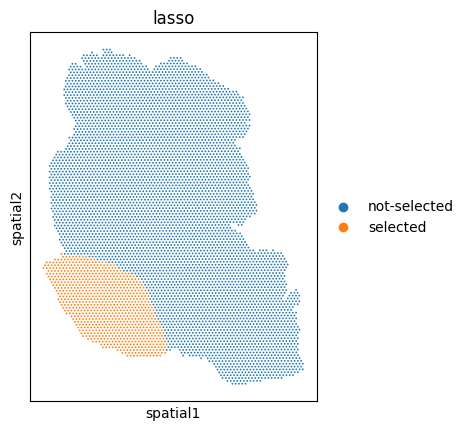

In [8]:
if "spatial" in sdata.table.uns:
    del sdata.table.uns["spatial"]

sc.pl.spatial(sdata.table, spot_size=200, color="lasso")

### Update the cell categories

Here, we run some Leiden clustering with `scanpy`. Then, we will update the Xenium Explorer files to display the spot clusters.

More generally, you can add new cell categories, i.e. a column of `sdata.table.obs`, and it will be shown by the Xenium Explorer after the instructions below. Note that we only display categorical columns, not numerical columns.

In [ ]:
import scanpy as sc

sc.pp.normalize_total(sdata.table)
sc.pp.log1p(sdata.table)
sc.pp.pca(sdata.table)
sc.pp.neighbors(sdata.table)
sc.tl.leiden(sdata.table)

Now, you can update the explorer with your new cluster assignment. You don't need to re-run the full conversion, you can simply update the `analysis.zarr.zip` file as below:

In [10]:
spatialdata_xenium_explorer.write_cell_categories(explorer_path, sdata.table)

[INFO] (spatialdata_xenium_explorer.core.table) Writing 3 cell categories: region, lasso, leiden


To visualize these clusters, re-open the `experiment.xenium` file, and select the new cell group (under the "Cells" panel, and in the "Cell groups" dropdown). See the examples above to see how it looks on the Xenium Explorer.